### Comparison of all the control strategies

This file demonstrates the comparison of P, PI and PID control simulations <br>
File contains both model simulation and comparison with experiments

In [1]:
# Import all required modules here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit

# run_constant is the simulator that runs the open loop experiment
from model_equations_and_simulators.run_constant import run_constant

# run_p_control is the simulator that runs the closed loop experiment with P control
from model_equations_and_simulators.run_p_control import run_p_control

# run_pi_control is the simulator that runs the closed loop experiment with PI control
from model_equations_and_simulators.run_pi_control import run_pi_control

# run_pi_control is the simulator that runs the closed loop experiment with PI control
from model_equations_and_simulators.run_pid_control import run_pid_control

In [2]:
# Load datasets for P control
data1 = pd.read_csv('experiment_data/P-FL_OD_run_data_042325.csv')
data2 = pd.read_csv('experiment_data/P-FL_OD_run_data_040625.csv')

# Extract relevant wells
P1_data1 = data1[['SP1_1', 'SP1_2', 'SP1_3', 'SP1_4', 'SP1_5', 'SP1_6']].to_numpy()
P2_data1 = data1[['SP2_1', 'SP2_2', 'SP2_3', 'SP2_4', 'SP2_5', 'SP2_6']].to_numpy()
P1_data2 = data2[['SP1_1', 'SP1_2', 'SP1_3']].to_numpy()
P2_data2 = data2[['SP2_1', 'SP2_2', 'SP2_3']].to_numpy()

green_data1 = data1[['G1']].to_numpy()
red_data1 = data1[['R1']].to_numpy()

green_data2 = data2[['G1', 'G2', 'G3']].to_numpy()
red_data2 = data2[['R1', 'R2', 'R3']].to_numpy()

# Time axis
interval = 10
min_len = min(P1_data1.shape[0], P1_data2.shape[0])
time_exp_P = np.arange(interval, (min_len + 1) * interval, interval)

# Truncate to matching length
green_data1 = green_data1[:min_len, :]
green_data2 = green_data2[:min_len, :]
red_data1 = red_data1[:min_len, :]
red_data2 = red_data2[:min_len, :]
P1_data1 = P1_data1[:min_len, :]
P1_data2 = P1_data2[:min_len, :]
P2_data1 = P2_data1[:min_len, :]
P2_data2 = P2_data2[:min_len, :]

# Combine datasets
green_combined = np.hstack([green_data1, green_data2])
red_combined = np.hstack([red_data1, red_data2])
P1_combined = np.hstack([P1_data1, P1_data2])
P2_combined = np.hstack([P2_data1, P2_data2])

# Compute mean profiles
green_mean = np.mean(green_combined, axis=1)
red_mean = np.mean(red_combined, axis=1)
P1_mean = np.mean(P1_combined, axis=1)
P2_mean = np.mean(P2_combined, axis=1)

# Use green max from experimental data
green_max_expt_P = np.max(green_mean)

# Setpoint values
st_pt_1 = 11500
st_pt_2 = 18500

# === Compute std for plotting shaded regions ===

# Standard deviations
P1_std = np.std(P1_combined, axis=1)
P2_std = np.std(P2_combined, axis=1)
green_std = np.std(green_combined, axis=1)
red_std = np.std(red_combined, axis=1)

# Normalize std
P1_std_norm = P1_std / green_max_expt_P
P2_std_norm = P2_std / green_max_expt_P
green_std_norm = green_std / green_max_expt_P
red_std_norm = red_std / green_max_expt_P

# Also normalize mean values for plotting
P1_mean_norm = P1_mean / green_max_expt_P
P2_mean_norm = P2_mean / green_max_expt_P
green_mean_norm = green_mean / green_max_expt_P
red_mean_norm = red_mean / green_max_expt_P


# Color dictionary
color_dict = {
    'set_point_1': '#6759d4',
    'set_point_2': '#ebab4b',
    'green': 'green',
    'red': 'red'
}

In [3]:
# Load dataset for PI control 

data1_PI = pd.read_csv('experiment_data/PI-FL_OD_run_data_042525.csv')
data2_PI = pd.read_csv('experiment_data/PI-FL_OD_run_data_041025.csv')

PI1_data1 = data1_PI[['SP1_1',  'SP1_2',  'SP1_3']].to_numpy()
PI2_data1 = data1_PI[['SP2_1',  'SP2_2',  'SP2_3']].to_numpy()

PI1_data2 = data2_PI[['SP1_1',  'SP1_2',  'SP1_3']].to_numpy()
PI2_data2 = data2_PI[['SP2_1',  'SP2_2',  'SP2_3']].to_numpy()

# Extract Green/Red constants (with replicates for 040825)
red_data1_PI = data1_PI[['R1',  'R2',  'R3']].to_numpy()
green_data1_PI = data1_PI[['G1',  'G2', 'G3']].to_numpy()

# For 0401025, Green and Red have only 1 well each
green_data2_PI = data2_PI[['G1']].to_numpy()
red_data2_PI = data2_PI[['R1']].to_numpy()

# Truncate all data to shared minimum length
min_len_PI = min(PI1_data1.shape[0], PI1_data2.shape[0])
time_exp_PI = np.arange(interval, (min_len_PI + 1) * interval, interval)
P1_data1_PI = PI1_data1[:min_len_PI]; P2_data1_PI = PI2_data1[:min_len_PI]
P1_data2_PI = PI1_data2[:min_len_PI]; P2_data2_PI = PI2_data2[:min_len_PI]
green_data1_PI = green_data1_PI[:min_len_PI]; green_data2_PI = green_data2_PI[:min_len_PI]
red_data1_PI = red_data1_PI[:min_len_PI]; red_data2_PI = red_data2_PI[:min_len_PI]

# Merge all experimental replicates
P1_combined_PI = np.hstack((P1_data1_PI, P1_data2_PI))
P2_combined_PI = np.hstack((P2_data1_PI, P2_data2_PI))
green_combined_PI = np.hstack((green_data1_PI, green_data2_PI))
red_combined_PI = np.hstack((red_data1_PI, red_data2_PI))

# Compute means and standard deviations
P1_mean_PI = np.mean(P1_combined_PI, axis=1)
P1_std_PI = np.std(P1_combined_PI, axis=1)
P2_mean_PI = np.mean(P2_combined_PI, axis=1)
P2_std_PI = np.std(P2_combined_PI, axis=1)
green_mean_PI = np.mean(green_combined_PI, axis=1)
green_std_PI = np.std(green_combined_PI, axis=1)
red_mean_PI = np.mean(red_combined_PI, axis=1)
red_std_PI = np.std(red_combined_PI, axis=1)

# Use green max from experimental data
green_max_expt_PI = np.max(green_mean_PI)

# Normalize std
P1_std_norm_PI = P1_std_PI / green_max_expt_P
P2_std_norm_PI = P2_std_PI / green_max_expt_P
green_std_norm_PI = green_std_PI / green_max_expt_P
red_std_norm_PI = red_std_PI / green_max_expt_P

# Also normalize mean values for plotting
P1_mean_norm_PI = P1_mean_PI / green_max_expt_P
P2_mean_norm_PI = P2_mean_PI / green_max_expt_P
green_mean_norm_PI = green_mean_PI / green_max_expt_P
red_mean_norm_PI = red_mean_PI / green_max_expt_P

In [4]:
# Load dataset for PID control 

data1_PID = pd.read_csv('experiment_data/PID-FL_OD_run_data_050725.csv')
data2_PID = pd.read_csv('experiment_data/PID-FL_OD_run_data_050925.csv')

PID1_data1 = data1_PID[['SP1_1',  'SP1_2',  'SP1_3']].to_numpy()
PID2_data1 = data1_PID[['SP2_1',  'SP2_2',  'SP2_3']].to_numpy()

PID1_data2 = data2_PID[['SP1_1',  'SP1_2',  'SP1_3']].to_numpy()
PID2_data2 = data2_PID[['SP2_1',  'SP2_2',  'SP2_3']].to_numpy()

red_data1_PID = data1_PID[['R1',  'R2',  'R3']].to_numpy()
green_data1_PID = data1_PID[['G1',  'G2', 'G3']].to_numpy()

red_data2_PID = data2_PID[['R1',  'R2',  'R3']].to_numpy()
green_data2_PID = data2_PID[['G1',  'G2', 'G3']].to_numpy()

# Truncate all data to shared minimum length
min_len_PID = min(PID1_data1.shape[0], PID1_data2.shape[0])
time_exp_PID = np.arange(interval, (min_len_PID + 1) * interval, interval)
P1_data1_PID = PID1_data1[:min_len_PID]; P2_data1_PID = PID2_data1[:min_len_PID]
P1_data2_PID = PID1_data2[:min_len_PID]; P2_data2_PID = PID2_data2[:min_len_PID]
green_data1_PID = green_data1_PID[:min_len_PID]; green_data2_PID = green_data2_PID[:min_len_PID]
red_data1_PID = red_data1_PID[:min_len_PID]; red_data2_PID = red_data2_PID[:min_len_PID]

# Merge all experimental replicates
P1_combined_PID = np.hstack((P1_data1_PID, P1_data2_PID))
P2_combined_PID = np.hstack((P2_data1_PID, P2_data2_PID))
green_combined_PID = np.hstack((green_data1_PID, green_data2_PID))
red_combined_PID = np.hstack((red_data1_PID, red_data2_PID))

# Compute means and standard deviations
P1_mean_PID = np.mean(P1_combined_PID, axis=1)
P1_std_PID = np.std(P1_combined_PID, axis=1)
P2_mean_PID = np.mean(P2_combined_PID, axis=1)
P2_std_PID = np.std(P2_combined_PID, axis=1)
green_mean_PID = np.mean(green_combined_PID, axis=1)
green_std_PID = np.std(green_combined_PID, axis=1)
red_mean_PID = np.mean(red_combined_PID, axis=1)
red_std_PID = np.std(red_combined_PID, axis=1)

# Use green max from experimental data
green_max_expt_PID = np.max(green_mean_PID)

# Normalize std
P1_std_norm_PID = P1_std_PID / green_max_expt_P
P2_std_norm_PID = P2_std_PID / green_max_expt_P
green_std_norm_PID = green_std_PID / green_max_expt_P
red_std_norm_PID = red_std_PID / green_max_expt_P

# Also normalize mean values for plotting
P1_mean_norm_PID = P1_mean_PID / green_max_expt_P
P2_mean_norm_PID = P2_mean_PID / green_max_expt_P
green_mean_norm_PID = green_mean_PID / green_max_expt_P
red_mean_norm_PID = red_mean_PID / green_max_expt_P

In [5]:
# define model parameters 


p = pd.read_csv('parameters/TCS_model_param_file.csv').to_numpy()
p = p[:,2]

params = lmfit.Parameters()

params.add(name = 'k_green', value = p[0], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'k_red', value = p[1], min = 1e0, max = 1e4, vary = 1)
params.add(name = 'b_green', value = p[2], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'b_red', value = p[3], min = 1e0, max = 1e4, vary = 1)

params.add(name = 'k_sp_b', value = p[4], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'k_sp_u', value = p[5], min = 1e-4, max = 1e4, vary = 1)

params.add(name = 'k_rp_b', value = p[6], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'k_rp_u', value = p[7], min = 1e-4, max = 1e4, vary = 1)

params.add(name = 'beta', value = p[8], min = 1e-1, max = 500, vary = 1)
params.add(name = 'l0', value = p[9], min = 0, max = 0.5, vary = 1)
params.add(name = 'Kc', value = p[10], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'd_m', value = p[11], min = 0.05, max = 0.35, vary = 1)
params.add(name = 'k_tl', value = p[12], min = 0.05, max = 10, vary = 1)
params.add(name = 'k_tli_b', value = p[13], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'k_tli_u', value = p[14], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'd_p', value = p[15], min = 1e-6, max = 1e-1, vary = 1)
params.add(name = 'k_fold', value = p[16], min = 0.05, max = 0.3, vary = 1)
params.add(name = 'b_fold', value = p[17], min = 0.1, max = 2, vary = 1)
params.add(name = 'n_gamma', value = p[18], min = 0.05, max = 0.9, vary = 1)
params.add(name = 'R_max', value = p[19], min = 1e0, max = 1e4, vary = 1)

params.add(name = 'S_0', value = p[20], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'R_0', value = p[21], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'Sp_0', value = p[22], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'Rp_0', value = p[23], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'mRNA_0', value = p[24], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'P_0', value = p[25], min = 1e-4, max = 1e4, vary = 1)
params.add(name = 'Pm_0', value = p[26], min = 1e-4, max = 1e4, vary = 1)


params.add(name = 'k_gr', value = p[27], vary = 0)
params.add(name = 'C_max', value = p[28], vary = 0)
params.add(name = 'C_0', value = p[29], vary = 0)

params.add(name = 'n_tcs', value = p[30], min = 0.1, max = 5, vary = 1)



# define initial conditions and solve the ODEs

x0 = np.zeros(11)

x0[0] = p[20] # S
x0[1] = p[22]# Sp
x0[2] = p[21] # R
x0[3] = p[23] # Rp
x0[4] = 0 # Ac
x0[5] = p[24] # mRNA
x0[6] = 0 # Ctic
x0[7] = p[25] # Unfolded Protein 
x0[8] = p[26] # Folded Protein 
x0[9] = p[29] # Initial Cell count
x0[10] = 0 # Initial intergal error

# Total time of simulation
t_final = 960

In [6]:
# Simulate the open loop, P, PI and PID control models

# Simulate constant input responses
t_green_init, y_green_init, sol_green_init = run_constant(t_final, x0, params, constant_input='green')
t_red_init, y_red_init, sol_red_init = run_constant(t_final, x0, params, constant_input='red')

# Use green max from model
green_max_model_init = np.max(sol_green_init[:, 8])

scaling_factor = (green_max_expt_P/green_max_model_init) * (1/60) # Used to convert the experimental gain to model gain

# Convert setpoints to model scale
st_pt_1_model_init_P = st_pt_1 * (green_max_model_init / green_max_expt_P)
st_pt_2_model_init_P = st_pt_2 * (green_max_model_init / green_max_expt_P)

# p_gain = 0.064 * (green_max_expt_P/green_max_model_init) * t_factor
p_gain = 0.064 * scaling_factor

# Run P-control simulation with scaled setpoints
t_p1_P, pctrl_1_P, sol_1_P = run_p_control(t_final, st_pt_1_model_init_P, p_gain, x0, params)
t_p2_P, pctrl_2_P, sol_2_P = run_p_control(t_final, st_pt_2_model_init_P, p_gain, x0, params)


# Simulate pi-control inputs
t_green_PI, y_green_PI, sol_green_PI = run_constant(t_final, x0, params, constant_input='green')
t_red_PI, y_red_PI, sol_red_PI = run_constant(t_final, x0, params, constant_input='red')
green_max_model_PI = np.max(sol_green_PI[:, 8])
# Convert setpoints to model scale
st_pt_1_model_init_PI = st_pt_1 * (green_max_model_PI / green_max_expt_PI) * (green_max_expt_PI / green_max_expt_P)
st_pt_2_model_init_PI = st_pt_2 * (green_max_model_PI / green_max_expt_PI) * (green_max_expt_PI / green_max_expt_P)
# Controller gain
# pi_gain = 0.013 * (green_max_expt_PI/green_max_model_init) * t_factor
pi_gain = 0.013 * scaling_factor
tau_I = 1500

# Simulate pi-control setpoint 1
t_p1_PI, pctrl_1_PI, sol_1_PI, _ = run_pi_control(t_final, st_pt_1_model_init_PI, pi_gain, tau_I, x0, params)
# Simulate pi-control setpoint 2
t_p2_PI, pctrl_2_PI, sol_2_PI, _ = run_pi_control(t_final, st_pt_2_model_init_PI, pi_gain, tau_I, x0, params)

# Simulate pid-control inputs
t_green_PID, y_green_PID, sol_green_PID = run_constant(t_final, x0, params, constant_input='green')
t_red_PID, y_red_PID, sol_red_PID = run_constant(t_final, x0, params, constant_input='red')
green_max_model_PID = np.max(sol_green_PID[:, 8])

st_pt_1_model_init_PID = st_pt_1 * (green_max_model_PID / green_max_expt_PID) * (green_max_expt_PID / green_max_expt_P)
st_pt_2_model_init_PID = st_pt_2 * (green_max_model_PID / green_max_expt_PID) * (green_max_expt_PID / green_max_expt_P)
# Controller gain
# pid_gain = 0.032 * (green_max_expt_PID/green_max_model_init) * t_factor 
pid_gain = 0.032 * scaling_factor
tau_I = 1500 
tau_D = 120  

# Simulate pid-control setpoint 1
t_p1_PID, pctrl_1_PID, sol_1_PID, _ = run_pid_control(t_final, st_pt_1_model_init_PID, pid_gain, tau_I, tau_D, x0, params)
# Simulate pid-control setpoint 2
t_p2_PID, pctrl_2_PID, sol_2_PID, _ = run_pid_control(t_final, st_pt_2_model_init_PID, pid_gain, tau_I, tau_D,  x0, params)

# Normalize all outputs to green max from model
green_sim_norm_init = sol_green_init[:, 8] / green_max_model_init
red_sim_norm_init = sol_red_init[:, 8] / green_max_model_init

green_sim_norm_PI = sol_green_PI[:, 8] / green_max_model_init
red_sim_norm_PI = sol_red_PI[:, 8] / green_max_model_init

green_sim_norm_PID = sol_green_PID[:, 8] / green_max_model_init
red_sim_norm_PID = sol_red_PID[:, 8] / green_max_model_init

pctrl_1_norm_P = np.array(pctrl_1_P) / green_max_model_init
pctrl_2_norm_P = np.array(pctrl_2_P) / green_max_model_init

pctrl_1_norm_PI = np.array(pctrl_1_PI) / green_max_model_init
pctrl_2_norm_PI = np.array(pctrl_2_PI) / green_max_model_init

pctrl_1_norm_PID = np.array(pctrl_1_PID) / green_max_model_init
pctrl_2_norm_PID = np.array(pctrl_2_PID) / green_max_model_init

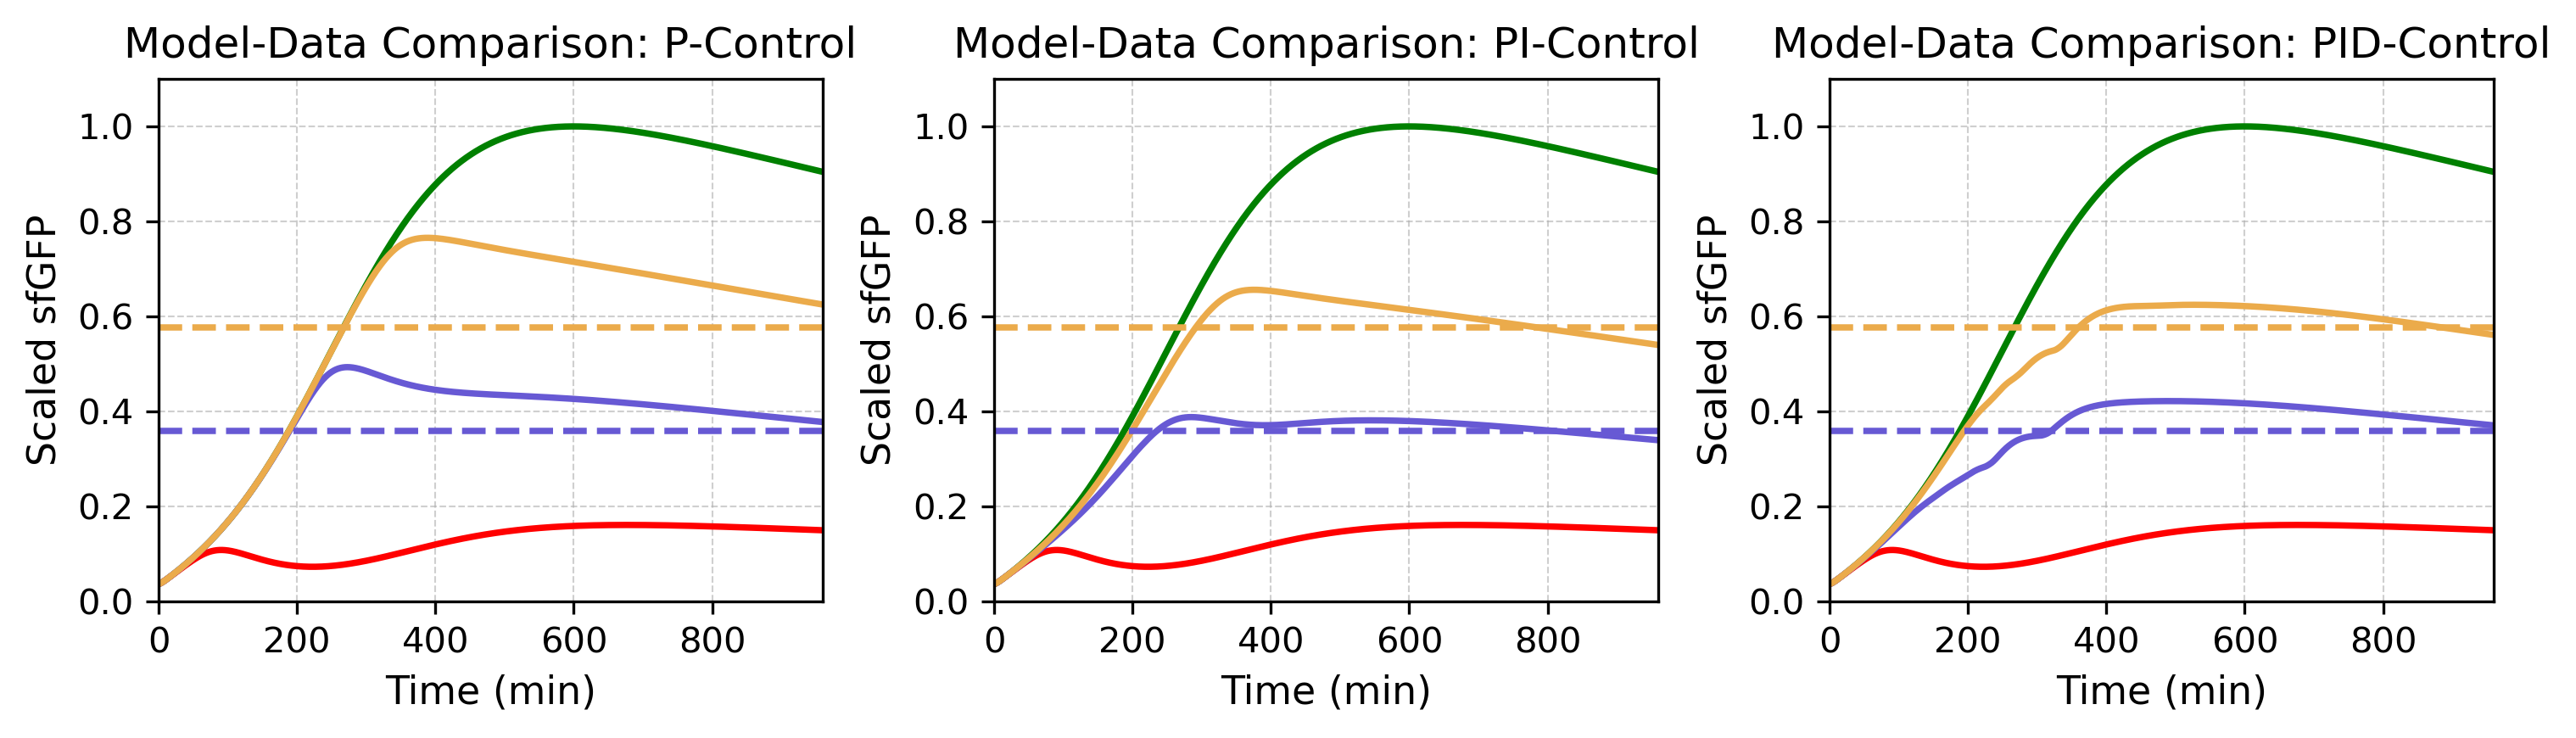

In [7]:
# Plot predictions 
# Compare all the three control strategies against each other 

fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=300)
lwd = 1.8
alp = 0.5

# Model predictions

i = 0
ax[i].plot(t_green_init, green_sim_norm_init, color='g', linestyle='-', linewidth=lwd, label='Model: Green Const.')
ax[i].plot(t_red_init, red_sim_norm_init, color='r', linestyle='-', linewidth=lwd, label='Model: Red Const.')
ax[i].plot(t_p1_P, pctrl_1_norm_P, color=color_dict['set_point_1'], linewidth=lwd, label='Model: Set Pt. 1')
ax[i].plot(t_p2_P, pctrl_2_norm_P, color=color_dict['set_point_2'], linewidth=lwd, label='Model: Set Pt. 2')

# Horizontal lines at model-scaled setpoints
ax[i].axhline(y = st_pt_1 / green_max_expt_P, color=color_dict['set_point_1'], linestyle='--', linewidth=lwd)
ax[i].axhline(y = st_pt_2 / green_max_expt_P, color=color_dict['set_point_2'], linestyle='--', linewidth=lwd)

# Formatting
ax[i].set_xlabel('Time (min)', fontsize=11)
ax[i].set_ylabel('Scaled sfGFP', fontsize=11)
ax[i].set_xlim((0, t_final))
ax[i].set_ylim((0, 1.1))
ax[i].set_title('Model-Data Comparison: P-Control', fontsize=12)
ax[i].tick_params(axis='both', labelsize=10)
ax[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

i = 1
ax[i].plot(t_green_PI, green_sim_norm_PI, color='green', linestyle='-', linewidth=lwd, label='Model: Green Const.')
ax[i].plot(t_red_PI, red_sim_norm_PI, color='red', linestyle='-', linewidth=lwd, label='Model: Red Const.')
ax[i].plot(t_p1_PI, pctrl_1_norm_PI, color=color_dict['set_point_1'], linewidth=lwd, label='Model: Set Pt. 1')
ax[i].plot(t_p2_PI, pctrl_2_norm_PI, color=color_dict['set_point_2'], linewidth=lwd, label='Model: Set Pt. 2')


# Horizontal lines at model-scaled setpoints
ax[i].axhline(y=st_pt_1 / green_max_expt_P, color=color_dict['set_point_1'], linestyle='--', linewidth=lwd)
ax[i].axhline(y=st_pt_2 / green_max_expt_P, color=color_dict['set_point_2'], linestyle='--', linewidth=lwd)

# Formatting
ax[i].set_xlabel('Time (min)', fontsize=11)
ax[i].set_ylabel('Scaled sfGFP', fontsize=11)
ax[i].set_xlim((0, t_final))
ax[i].set_ylim((0, 1.1))
ax[i].set_title('Model-Data Comparison: PI-Control', fontsize=12)
ax[i].tick_params(axis='both', labelsize=10)
ax[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

i = 2
ax[i].plot(t_green_PID, green_sim_norm_PID, color='g', linestyle='-', linewidth=lwd, label='Model: Green Const.')
ax[i].plot(t_red_PID, red_sim_norm_PID, color='r', linestyle='-', linewidth=lwd, label='Model: Red Const.')
ax[i].plot(t_p1_PID, pctrl_1_norm_PID, color=color_dict['set_point_1'], linewidth=lwd, label='Model: Set Pt. 1')
ax[i].plot(t_p2_PID, pctrl_2_norm_PID, color=color_dict['set_point_2'], linewidth=lwd, label='Model: Set Pt. 2')

# Horizontal lines at model-scaled setpoints
ax[i].axhline(y=st_pt_1 / green_max_expt_P, color=color_dict['set_point_1'], linestyle='--', linewidth=lwd)
ax[i].axhline(y=st_pt_2 / green_max_expt_P, color=color_dict['set_point_2'], linestyle='--', linewidth=lwd)

# Formatting
ax[i].set_xlabel('Time (min)', fontsize=11)
ax[i].set_ylabel('Scaled sfGFP', fontsize=11)
ax[i].set_xlim((0, t_final))
ax[i].set_ylim((0, 1.1))
ax[i].set_title('Model-Data Comparison: PID-Control', fontsize=12)
ax[i].tick_params(axis='both', labelsize=10)
ax[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()


In [8]:
## Merge all the open loop data across all the experiments and compare the 
## overlayed data with model simulations

# Truncate to minimum length across all relevant datasets
min_len_all = min(
    green_data1.shape[0], green_data2.shape[0],
    green_data1_PI.shape[0], green_data2_PI.shape[0],
    green_data1_PID.shape[0], green_data2_PID.shape[0],
    red_data1.shape[0], red_data2.shape[0],
    red_data1_PI.shape[0], red_data2_PI.shape[0],
    red_data1_PID.shape[0], red_data2_PID.shape[0],
    P1_mean_norm.shape[0], P2_mean_norm.shape[0],
    P1_mean_norm_PI.shape[0], P2_mean_norm_PI.shape[0],
    P1_mean_norm_PID.shape[0], P2_mean_norm_PID.shape[0]
)

def truncate(arr):
    return arr[:min_len_all]

# Combine all green/red data across experiments
green_all = np.hstack([
    truncate(green_data1),
    truncate(green_data2),
    truncate(green_data1_PI),
    truncate(green_data2_PI),
    truncate(green_data1_PID),
    truncate(green_data2_PID)
])

red_all = np.hstack([
    truncate(red_data1),
    truncate(red_data2),
    truncate(red_data1_PI),
    truncate(red_data2_PI),
    truncate(red_data1_PID),
    truncate(red_data2_PID)
])

# === NEW: Normalize using the max of the mean signal ===
green_mean_raw = np.mean(green_all, axis=1)
green_max_from_mean = np.max(green_mean_raw)

red_mean_raw = np.mean(red_all, axis=1)
red_max_from_mean = np.max(red_mean_raw)

# Normalize all replicates using green_max_from_mean
green_all_norm = green_all / green_max_from_mean
#green_all_norm = green_all / np.max(green_combined)
green_mean_all_norm = np.mean(green_all_norm, axis=1)
green_std_all_norm = np.std(green_all_norm, axis=1)

red_all_norm = red_all / green_max_from_mean  # normalize red with same scalar for comparison
#red_all_norm = red_all / np.max(green_combined)
red_mean_all_norm = np.mean(red_all_norm, axis=1)
red_std_all_norm = np.std(red_all_norm, axis=1)

# Truncate P1/P2 normalized values
P1_mean_norm = truncate(P1_mean_norm); P1_std_norm = truncate(P1_std_norm)
P2_mean_norm = truncate(P2_mean_norm); P2_std_norm = truncate(P2_std_norm)
P1_mean_norm_PI = truncate(P1_mean_norm_PI); P1_std_norm_PI = truncate(P1_std_norm_PI)
P2_mean_norm_PI = truncate(P2_mean_norm_PI); P2_std_norm_PI = truncate(P2_std_norm_PI)
P1_mean_norm_PID = truncate(P1_mean_norm_PID); P1_std_norm_PID = truncate(P1_std_norm_PID)
P2_mean_norm_PID = truncate(P2_mean_norm_PID); P2_std_norm_PID = truncate(P2_std_norm_PID)

# Truncate time vector to match
interval = 10
time_shared = np.arange(interval, (min_len_all + 1) * interval, interval)

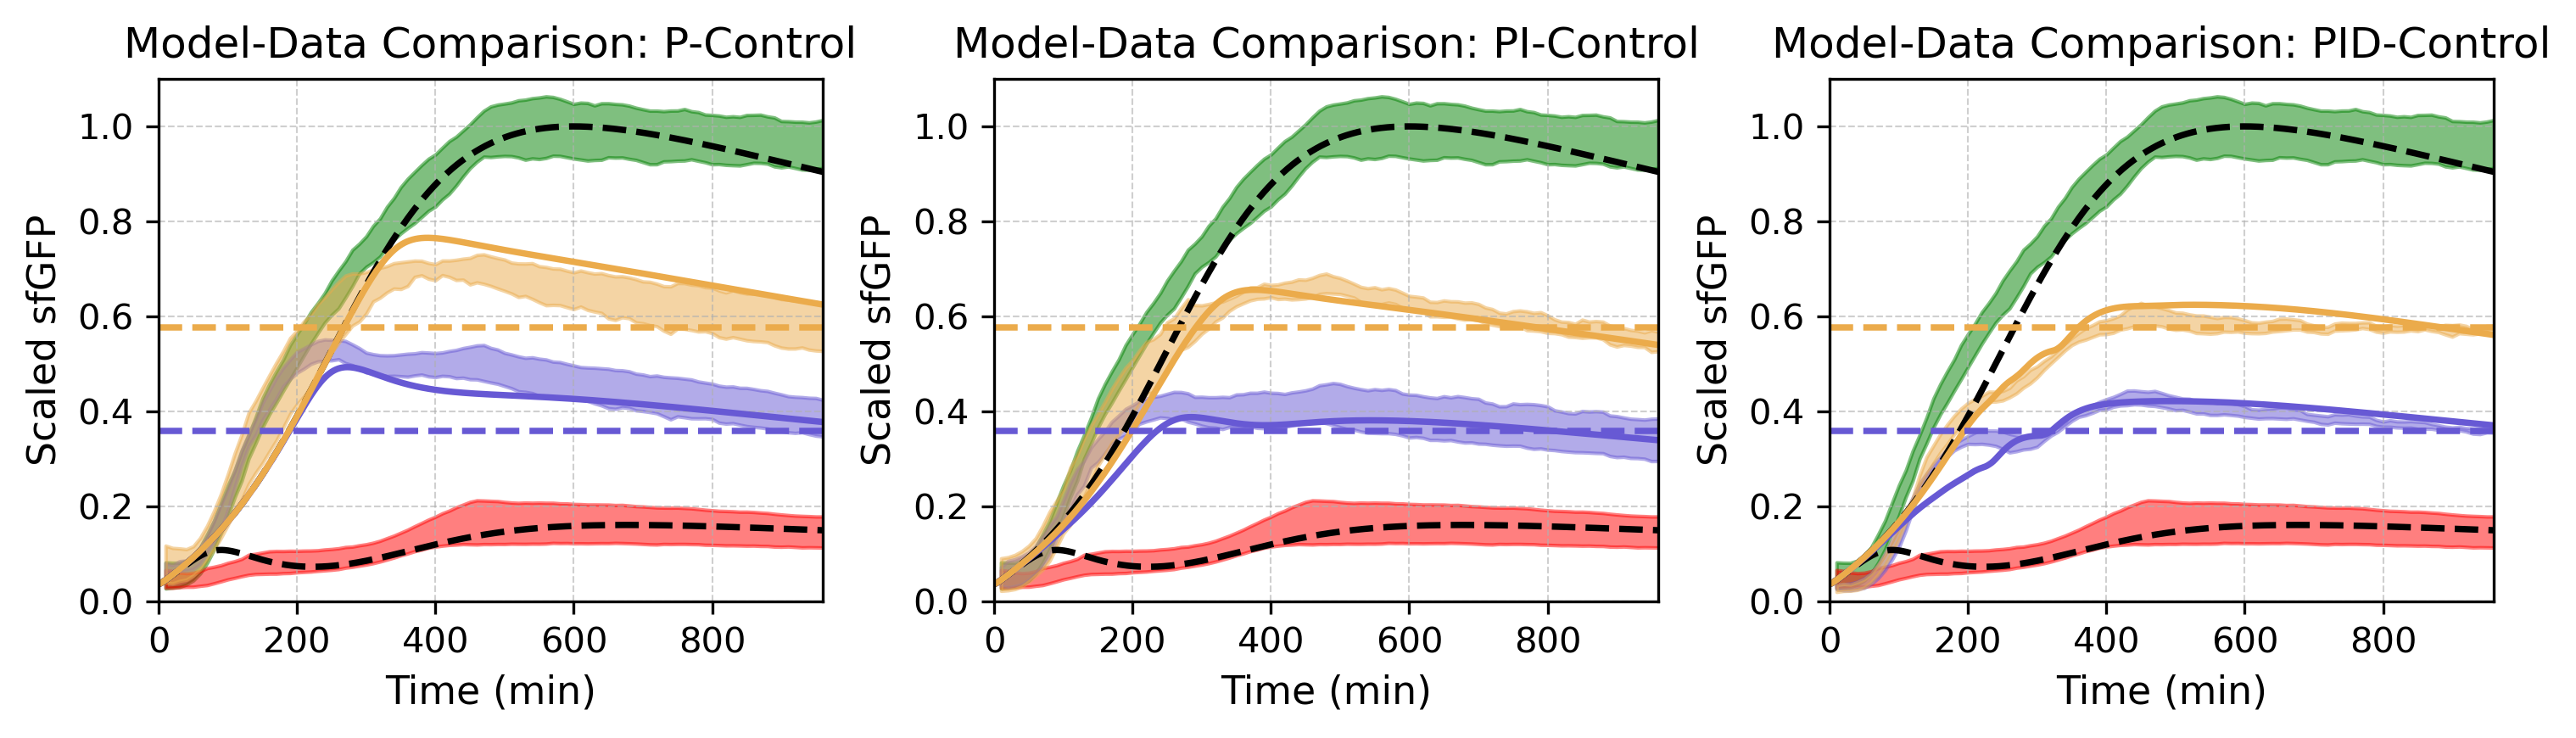

In [9]:
# Plot predictions vs merged data
# Compare all the three control strategies against each other 

fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=300)
lwd = 1.8
alp = 0.5

# Plotting helper
def add_plot(ax_i, t_green, green_sim, t_red, red_sim, t_p1, p1, t_p2, p2, 
             P1_mean, P1_std, P2_mean, P2_std, title):

    ax_i.plot(t_green, green_sim, color='black', linestyle='--', linewidth=lwd, label='Model: Green Const.')
    ax_i.plot(t_red, red_sim, color='black', linestyle='--', linewidth=lwd, label='Model: Red Const.')
    ax_i.plot(t_p1, p1, color=color_dict['set_point_1'], linewidth=lwd, label='Model: Set Pt. 1')
    ax_i.plot(t_p2, p2, color=color_dict['set_point_2'], linewidth=lwd, label='Model: Set Pt. 2')

    ax_i.fill_between(time_shared, green_mean_all_norm - green_std_all_norm, green_mean_all_norm + green_std_all_norm, 
                      color='green', alpha=alp, label='Exp: Green Const.')
    ax_i.fill_between(time_shared, red_mean_all_norm - red_std_all_norm, red_mean_all_norm + red_std_all_norm, 
                      color='red', alpha=alp, label='Exp: Red Const.')
    ax_i.fill_between(time_shared, P1_mean - P1_std, P1_mean + P1_std, 
                      color=color_dict['set_point_1'], alpha=alp, label='Exp: Set Pt. 1')
    ax_i.fill_between(time_shared, P2_mean - P2_std, P2_mean + P2_std, 
                      color=color_dict['set_point_2'], alpha=alp, label='Exp: Set Pt. 2')

    ax_i.axhline(y=st_pt_1 / np.max(green_mean), color=color_dict['set_point_1'], linestyle='--', linewidth=lwd)
    ax_i.axhline(y=st_pt_2 / np.max(green_mean), color=color_dict['set_point_2'], linestyle='--', linewidth=lwd)

    ax_i.set_xlabel('Time (min)', fontsize=11)
    ax_i.set_ylabel('Scaled sfGFP', fontsize=11)
    ax_i.set_xlim((0, 960))
    ax_i.set_ylim((0, 1.1))
    ax_i.set_title(title, fontsize=12)
    ax_i.tick_params(axis='both', labelsize=10)
    ax_i.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)


# P-Control
add_plot(ax[0], t_green_init, green_sim_norm_init, t_red_init, red_sim_norm_init,
         t_p1_P, pctrl_1_norm_P, t_p2_P, pctrl_2_norm_P,
         P1_mean_norm, P1_std_norm, P2_mean_norm, P2_std_norm,
         'Model-Data Comparison: P-Control')

# PI-Control
add_plot(ax[1], t_green_PI, green_sim_norm_PI, t_red_PI, red_sim_norm_PI,
         t_p1_PI, pctrl_1_norm_PI, t_p2_PI, pctrl_2_norm_PI,
         P1_mean_norm_PI, P1_std_norm_PI, P2_mean_norm_PI, P2_std_norm_PI,
         'Model-Data Comparison: PI-Control')

# PID-Control
add_plot(ax[2], t_green_PID, green_sim_norm_PID, t_red_PID, red_sim_norm_PID,
         t_p1_PID, pctrl_1_norm_PID, t_p2_PID, pctrl_2_norm_PID,
         P1_mean_norm_PID, P1_std_norm_PID, P2_mean_norm_PID, P2_std_norm_PID,
         'Model-Data Comparison: PID-Control')

plt.tight_layout()
